<span style="font-size: 34px;">SHORTEST REMAINING TIME FIRST</span>

In [102]:
import matplotlib.pyplot as plt

In [103]:
processes = [
    {'process_id': 'A', 'arrival_time': 0, 'burst_time': 8, 'priority': 2},
    {'process_id': 'B', 'arrival_time': 3, 'burst_time': 4, 'priority': 1},
    {'process_id': 'C', 'arrival_time': 4, 'burst_time': 5, 'priority': 3},
    {'process_id': 'D', 'arrival_time': 6, 'burst_time': 3, 'priority': 2},
    {'process_id': 'E', 'arrival_time': 10, 'burst_time': 2, 'priority': 1}
]

In [104]:
def shortest_remaining_time_first(processes):
    processes.sort(key=lambda x: x['arrival_time'])  # Sort processes by arrival time
    
    current_time = 0
    completed_processes = []
    ready_queue = []
    gantt_chart = []

    while len(completed_processes) < len(processes):
        # Add processes to ready queue if they have arrived by the current time
        for process in processes:
            if process['arrival_time'] <= current_time and process not in ready_queue and process['burst_time'] > 0:
                ready_queue.append(process)

        # If ready queue is not empty, select the process with the shortest remaining time
        if ready_queue:
            ready_queue.sort(key=lambda x: x['burst_time'])  # Sort by remaining burst time
            current_process = ready_queue.pop(0)  # Get the process with shortest remaining time

            # Execute the process for 1 unit of time
            current_process['burst_time'] -= 1
            current_time += 1
            gantt_chart.append((current_process['process_id'], current_time))

            # If process is finished, calculate waiting time and turnaround time
            if current_process['burst_time'] == 0:
                current_process['completion_time'] = current_time
                current_process['turnaround_time'] = current_process['completion_time'] - current_process['arrival_time']
                current_process['waiting_time'] = current_process['turnaround_time'] - (current_process['burst_time'] + 1)  # Original burst time
                completed_processes.append(current_process)
        else:
            # If no process is ready, increment time
            current_time += 1

    return completed_processes, gantt_chart


In [105]:
def calculate_averages(processes):
    waiting_time = sum(process['waiting_time'] for process in processes)
    turnaround_time = sum(process['turnaround_time'] for process in processes)
    avg_waiting_time = waiting_time / len(processes)
    avg_turnaround_time = turnaround_time / len(processes)
    return avg_waiting_time, avg_turnaround_time


<span style="font-size: 34px;">Gantt Chart Prettier</span>

In [106]:
def display_gantt_chart(gantt_chart):
    process_ids = [process_id for process_id, _ in gantt_chart]
    times = [time for _, time in gantt_chart]

    # to make it colorful
    norm = plt.Normalize(min(times), max(times))
    cmap = plt.cm.get_cmap('summer')  # Change color map for better visualization
    colors = [cmap(norm(time)) for time in times]

    plt.figure(figsize=(10, 5))
    plt.barh(process_ids, [1]*len(process_ids), left=times, color=colors, height=0.5)
    plt.xlabel('Time')
    plt.ylabel('Process')
    plt.title('Shortest Remaining Time First Scheduling Gantt Chart')
    plt.grid(True)
    plt.show()


In [107]:
def main():
    scheduled_processes, gantt_chart = shortest_remaining_time_first(processes)
    
    # Calculate averages
    avg_waiting_time, avg_turnaround_time = calculate_averages(scheduled_processes)

    # Display process details in a table
    print("Process ID\tArrival Time\tBurst Time\tPriority\tWaiting Time\tTurnaround Time")
    for process in scheduled_processes:
        print(f"{process['process_id']}\t\t{process['arrival_time']}\t\t{process['burst_time']}\t\t{process['priority']}\t\t{process['waiting_time']}\t\t{process['turnaround_time']}")

    print(f"\nAverage Waiting Time: {avg_waiting_time:.2f}")
    print(f"Average Turnaround Time: {avg_turnaround_time:.2f}")

    # Display the Gantt chart
    display_gantt_chart(gantt_chart)


Process ID	Arrival Time	Burst Time	Priority	Waiting Time	Turnaround Time
B		3		0		1		3		4
D		6		0		2		3		4
E		10		0		1		1		2
A		0		0		2		16		17
C		4		0		3		17		18

Average Waiting Time: 8.00
Average Turnaround Time: 9.00


C:\Users\USER\AppData\Local\Temp\ipykernel_8188\2726910866.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('summer')  # Change color map for better visualization


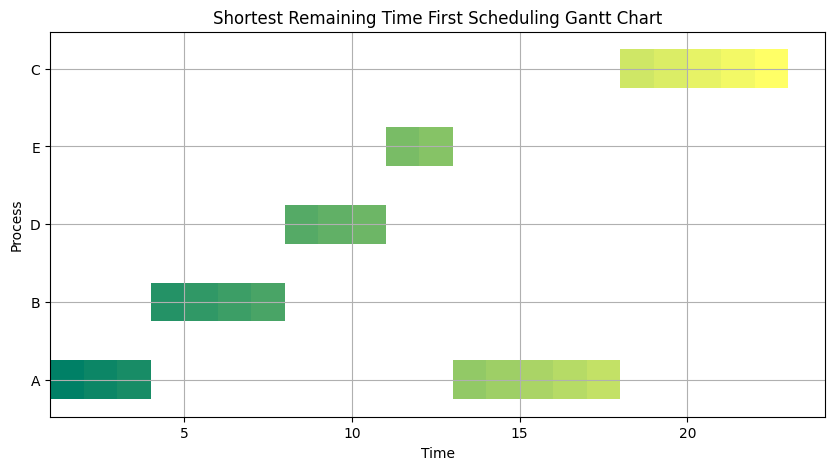

In [108]:
if __name__ == "__main__":
    main()
